# AB Final - Alumno: Sergio Sánchez de la Peña
## Asignatura: Advance Programming for Data Science

Se instalan en caso de que se necesite y se importan las librerías necesarias.

In [1]:
options(warn = -1)
suppressPackageStartupMessages({
  library(dplyr)
  library(quantmod)
  library(zoo)
  library(tidyr)
  library(reshape2)
  library(scales)
  library(stringr)
  library(corrplot)
  library(plotly)
})

library(ggplot2)
library(dplyr)
library(reshape2)
library(forecast)
library(zoo)
library(tidyr)
library(scales)
library(stringr)
library(corrplot)
library(plotly)

Se abre el archivo csv

In [2]:
df = read.csv("world_development_data_interpolated.csv")

# tamaño df
dim(df)

[1] 9947   33

Se tiene la primera toma de contacto con el dataset:

In [3]:
head(df)

,Year,Country,Region,SubRegion,IntermRegion,SurfAreaSqKm,PopDens,PopGrowth.,GDP,GDPGrowth.,⋯,MerchTrade.GDP,MilExp.GDP,MobileSubs.100,MortRateU5,NetMigr,PopTotal,RevenueExGrants.GDP,SchEnrollPrim.,TaxRevenue.GDP,UrbanPopGrowth.
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1973,Afghanistan,Asia,Southern Asia,,652860.0,17.747275,2.5244212,1733333264,NA,⋯,18.17308,1.868910,NA,285.2,-3030,11575305,NA,35.21437,NA,5.688982
2,1973,Netherlands,Europe,Western Europe,,41530.0,398.084182,0.8273310,71840909664,5.444223,⋯,78.08364,2.702997,NA,14.1,31535,13439322,38.2941,100.04730,22.46063,1.337022
3,1973,Poland,Europe,Eastern Europe,,312690.0,108.907245,0.9081136,NA,NA,⋯,NA,NA,NA,30.5,-28055,33357200,NA,105.33872,NA,2.125265
4,1973,"Egypt, Arab Rep.",Africa,Northern Africa,,1001450.0,37.290448,2.1511827,10098534613,3.506830,⋯,20.16134,13.513514,NA,232.5,-112685,37120776,NA,70.22195,NA,3.007695
5,1973,Gabon,Africa,Sub-Saharan Africa,Middle Africa,267670.0,2.465510,2.0673824,722780701,10.182434,⋯,72.08272,1.303538,NA,149.4,613,635288,NA,130.28342,NA,7.959430
6,1973,United Arab Emirates,Asia,Western Asia,,98647.9,6.217206,11.8082030,NA,NA,⋯,NA,NA,NA,72.8,39563,441546,NA,74.63289,NA,11.808179


Se ven números de nulos. Se van a ver más adelante cuantos y de qué manera arreglar que R los considere todos los espacios vacíos como nulos.

In [4]:
colSums(is.na(df))

Year             Country              Region           SubRegion 
                  0                   0                   0                   0 
       IntermRegion        SurfAreaSqKm             PopDens          PopGrowth. 
                  0                  47                 650                  18 
                GDP          GDPGrowth.        AdolFertRate      AgriValAdd.GDP 
               1279                1523                   0                2451 
      DomCredit.GDP         Exports.GDP            FertRate           FDINetBoP 
               8762                2513                 201                1390 
       GNI.CapAtlas            GNIAtlas    GrossCapForm.GDP         Imports.GDP 
               2080                2079                2768                2513 
      IndValAdd.GDP       InflConsPric.        LifeExpBirth      MerchTrade.GDP 
               2502                1550                 207                1614 
         MilExp.GDP      MobileSubs.100          MortRateU5             NetMigr 
               3514                 751                 814                   0 
           PopTotal RevenueExGrants.GDP      SchEnrollPrim.      TaxRevenue.GDP 
                 17                5773                2017                5719 
    UrbanPopGrowth. 
                 18

Se ve que hay muchas celdas vacías y que no son reconocidas como NA, se procede a rellenar esos huecos como NA para que R y sus librerías puedan hacer un conteo correcto.

In [5]:
df[df=='']= NA

head(df)

,Year,Country,Region,SubRegion,IntermRegion,SurfAreaSqKm,PopDens,PopGrowth.,GDP,GDPGrowth.,⋯,MerchTrade.GDP,MilExp.GDP,MobileSubs.100,MortRateU5,NetMigr,PopTotal,RevenueExGrants.GDP,SchEnrollPrim.,TaxRevenue.GDP,UrbanPopGrowth.
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1973,Afghanistan,Asia,Southern Asia,NA,652860.0,17.747275,2.5244212,1733333264,NA,⋯,18.17308,1.868910,NA,285.2,-3030,11575305,NA,35.21437,NA,5.688982
2,1973,Netherlands,Europe,Western Europe,NA,41530.0,398.084182,0.8273310,71840909664,5.444223,⋯,78.08364,2.702997,NA,14.1,31535,13439322,38.2941,100.04730,22.46063,1.337022
3,1973,Poland,Europe,Eastern Europe,NA,312690.0,108.907245,0.9081136,NA,NA,⋯,NA,NA,NA,30.5,-28055,33357200,NA,105.33872,NA,2.125265
4,1973,"Egypt, Arab Rep.",Africa,Northern Africa,NA,1001450.0,37.290448,2.1511827,10098534613,3.506830,⋯,20.16134,13.513514,NA,232.5,-112685,37120776,NA,70.22195,NA,3.007695
5,1973,Gabon,Africa,Sub-Saharan Africa,Middle Africa,267670.0,2.465510,2.0673824,722780701,10.182434,⋯,72.08272,1.303538,NA,149.4,613,635288,NA,130.28342,NA,7.959430
6,1973,United Arab Emirates,Asia,Western Asia,NA,98647.9,6.217206,11.8082030,NA,NA,⋯,NA,NA,NA,72.8,39563,441546,NA,74.63289,NA,11.808179


In [6]:
colSums(is.na(df))

Year             Country              Region           SubRegion 
                  0                   0                   0                   0 
       IntermRegion        SurfAreaSqKm             PopDens          PopGrowth. 
               5733                  47                 650                  18 
                GDP          GDPGrowth.        AdolFertRate      AgriValAdd.GDP 
               1279                1523                   0                2451 
      DomCredit.GDP         Exports.GDP            FertRate           FDINetBoP 
               8762                2513                 201                1390 
       GNI.CapAtlas            GNIAtlas    GrossCapForm.GDP         Imports.GDP 
               2080                2079                2768                2513 
      IndValAdd.GDP       InflConsPric.        LifeExpBirth      MerchTrade.GDP 
               2502                1550                 207                1614 
         MilExp.GDP      MobileSubs.100          MortRateU5             NetMigr 
               3514                 751                 814                   0 
           PopTotal RevenueExGrants.GDP      SchEnrollPrim.      TaxRevenue.GDP 
                 17                5773                2017                5719 
    UrbanPopGrowth. 
                 18

Se ha reemplado correctamente pero es mejor ver el % de NA.

In [7]:
porcent_NA= (colSums(is.na(df))/ nrow(df))*100
sort(porcent_NA, decreasing= TRUE)

DomCredit.GDP RevenueExGrants.GDP        IntermRegion      TaxRevenue.GDP 
         88.0868604          58.0375993          57.6354680          57.4947220 
         MilExp.GDP    GrossCapForm.GDP         Exports.GDP         Imports.GDP 
         35.3272343          27.8274857          25.2638987          25.2638987 
      IndValAdd.GDP      AgriValAdd.GDP        GNI.CapAtlas            GNIAtlas 
         25.1533126          24.6405952          20.9108274          20.9007741 
     SchEnrollPrim.      MerchTrade.GDP       InflConsPric.          GDPGrowth. 
         20.2774706          16.2259978          15.5825877          15.3111491 
          FDINetBoP                 GDP          MortRateU5      MobileSubs.100 
         13.9740625          12.8581482           8.1833719           7.5500151 
            PopDens        LifeExpBirth            FertRate        SurfAreaSqKm 
          6.5346336           2.0810295           2.0207098           0.4725043 
         PopGrowth.     UrbanPopGrowth.            PopTotal                Year 
          0.1809591           0.1809591           0.1709058           0.0000000 
            Country              Region           SubRegion        AdolFertRate 
          0.0000000           0.0000000           0.0000000           0.0000000 
            NetMigr 
          0.0000000

Se ve que domestic credit tiene un 88% de nulos. Y que IntermRegion no va a aportar mucho más valor porque es más del 50% de nulos y especificar zonas tan concretas no aporta má valor. Se van a eliminar.

In [8]:
df= df[, !colnames(df) %in% c("DomCredit.GDP", "IntermRegion")]
head(df,10)

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopDens,PopGrowth.,GDP,GDPGrowth.,AdolFertRate,⋯,MerchTrade.GDP,MilExp.GDP,MobileSubs.100,MortRateU5,NetMigr,PopTotal,RevenueExGrants.GDP,SchEnrollPrim.,TaxRevenue.GDP,UrbanPopGrowth.
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1973,Afghanistan,Asia,Southern Asia,652860.0,17.7472747,2.5244212,1733333264,NA,142.874,⋯,18.17308,1.868910,NA,285.2,-3030,11575305,NA,35.21437,NA,5.6889819
2,1973,Netherlands,Europe,Western Europe,41530.0,398.0841825,0.8273310,71840909664,5.444223,16.931,⋯,78.08364,2.702997,NA,14.1,31535,13439322,38.2941,100.04730,22.46063,1.3370220
3,1973,Poland,Europe,Eastern Europe,312690.0,108.9072448,0.9081136,NA,NA,27.951,⋯,NA,NA,NA,30.5,-28055,33357200,NA,105.33872,NA,2.1252653
4,1973,"Egypt, Arab Rep.",Africa,Northern Africa,1001450.0,37.2904475,2.1511827,10098534613,3.506830,123.414,⋯,20.16134,13.513514,NA,232.5,-112685,37120776,NA,70.22195,NA,3.0076951
5,1973,Gabon,Africa,Sub-Saharan Africa,267670.0,2.4655101,2.0673824,722780701,10.182434,186.627,⋯,72.08272,1.303538,NA,149.4,613,635288,NA,130.28342,NA,7.9594297
6,1973,United Arab Emirates,Asia,Western Asia,98647.9,6.2172064,11.8082030,NA,NA,144.822,⋯,NA,NA,NA,72.8,39563,441546,NA,74.63289,NA,11.8081786
7,1973,Viet Nam,Asia,South-eastern Asia,331690.0,137.9190789,2.2192171,NA,NA,31.631,⋯,NA,NA,NA,79.9,-19999,44891281,NA,NA,NA,2.7370143
8,1973,Antigua and Barbuda,Americas,Latin America and the Caribbean,440.0,146.5068182,-0.3592503,NA,NA,106.138,⋯,NA,NA,NA,25.0,-1430,64463,NA,NA,NA,-0.1274581
9,1973,Mongolia,Asia,Eastern Asia,1564120.0,0.9062129,2.7819579,NA,NA,52.925,⋯,NA,NA,NA,NA,4610,1402309,NA,99.67121,NA,4.3186855


Se sigue con el análisis exploratorio:

In [9]:
sapply(df, class)

Year             Country              Region           SubRegion 
          "integer"         "character"         "character"         "character" 
       SurfAreaSqKm             PopDens          PopGrowth.                 GDP 
          "numeric"           "numeric"           "numeric"           "numeric" 
         GDPGrowth.        AdolFertRate      AgriValAdd.GDP         Exports.GDP 
          "numeric"           "numeric"           "numeric"           "numeric" 
           FertRate           FDINetBoP        GNI.CapAtlas            GNIAtlas 
          "numeric"           "numeric"           "numeric"           "numeric" 
   GrossCapForm.GDP         Imports.GDP       IndValAdd.GDP       InflConsPric. 
          "numeric"           "numeric"           "numeric"           "numeric" 
       LifeExpBirth      MerchTrade.GDP          MilExp.GDP      MobileSubs.100 
          "numeric"           "numeric"           "numeric"           "numeric" 
         MortRateU5             NetMigr            PopTotal RevenueExGrants.GDP 
          "numeric"           "numeric"           "numeric"           "numeric" 
     SchEnrollPrim.      TaxRevenue.GDP     UrbanPopGrowth. 
          "numeric"           "numeric"           "numeric"

Solo el año es entero. 3 son caracteres y el resto números decimales. 
Investigo los caracteres por si hay algún fallo.

In [10]:
# unique(df$Country).count()
length(unique(df$Country)) 
#¿203 países?

[1] 203

In [11]:
df$Country= trimws(df$Country)
df$Country= tolower(df$Country)
length(unique(df$Country)) 

unique(df$Country)

[1] 203

[1] "afghanistan"                    "netherlands"                   
  [3] "poland"                         "egypt, arab rep."              
  [5] "gabon"                          "united arab emirates"          
  [7] "viet nam"                       "antigua and barbuda"           
  [9] "mongolia"                       "haiti"                         
 [11] "central african republic"       "spain"                         
 [13] "malaysia"                       "israel"                        
 [15] "cuba"                           "saudi arabia"                  
 [17] "sudan"                          "cabo verde"                    
 [19] "new caledonia"                  "ethiopia"                      
 [21] "argentina"                      "venezuela, rb"                 
 [23] "germany"                        "turkmenistan"                  
 [25] "ghana"                          "el salvador"                   
 [27] "comoros"                        "slovak republic"               
 [29] "liechtenstein"                  "kenya"                         
 [31] "togo"                           "bolivia"                       
 [33] "philippines"                    "libya"                         
 [35] "kiribati"                       "marshall islands"              
 [37] "liberia"                        "korea, rep."                   
 [39] "colombia"                       "nepal"                         
 [41] "greece"                         "portugal"                      
 [43] "turks and caicos islands"       "slovenia"                      
 [45] "botswana"                       "samoa"                         
 [47] "cyprus"                         "ireland"                       
 [49] "andorra"                        "yemen, rep."                   
 [51] "thailand"                       "palau"                         
 [53] "ecuador"                        "faroe islands"                 
 [55] "indonesia"                      "timor-leste"                   
 [57] "bosnia and herzegovina"         "france"                        
 [59] "sao tome and principe"          "curacao"                       
 [61] "belarus"                        "north macedonia"               
 [63] "suriname"                       "angola"                        
 [65] "west bank and gaza"             "guyana"                        
 [67] "montenegro"                     "pakistan"                      
 [69] "burundi"                        "belgium"                       
 [71] "moldova"                        "honduras"                      
 [73] "macao sar, china"               "japan"                         
 [75] "panama"                         "seychelles"                    
 [77] "costa rica"                     "belize"                        
 [79] "mexico"                         "nicaragua"                     
 [81] "turkiye"                        "eswatini"                      
 [83] "eritrea"                        "paraguay"                      
 [85] "cameroon"                       "aruba"                         
 [87] "gambia, the"                    "uzbekistan"                    
 [89] "hungary"                        "united states"                 
 [91] "jamaica"                        "sierra leone"                  
 [93] "congo, rep."                    "madagascar"                    
 [95] "canada"                         "st. kitts and nevis"           
 [97] "austria"                        "estonia"                       
 [99] "mauritius"                      "tunisia"                       
[101] "benin"                          "iceland"                       
[103] "australia"                      "uruguay"                       
[105] "papua new guinea"               "south africa"                  
[107] "trinidad and tobago"            "congo, dem. rep."              
[109] "mauritania"                     "united kingdom"                
[111] "peru"                           "az

Se ve que hay países que no están reconocidos por la ONU. 
De cualquier modo, no se eliminarán, solo hay 10 países de diferencia

In [28]:
print(table(df$Country))


                   afghanistan                        albania 
                            49                             49 
                       algeria                        andorra 
                            49                             49 
                        angola            antigua and barbuda 
                            49                             49 
                     argentina                        armenia 
                            49                             49 
                         aruba                      australia 
                            49                             49 
                       austria                     azerbaijan 
                            49                             49 
                  bahamas, the                        bahrain 
                            49                             49 
                    bangladesh                       barbados 
                            49                        

Efectivamente, todos los países aparecen correctamente las mismas veces.

## Análisis de correlación con GDP y GDP Growth

Para la correlacion se necesita seguir limpiando el nombre de las columnas y facilitar el trabajo.

In [13]:
colnames(df) <- gsub("\\.", "", colnames(df))
print(colnames(df))

 [1] "Year"               "Country"            "Region"            
 [4] "SubRegion"          "SurfAreaSqKm"       "PopDens"           
 [7] "PopGrowth"          "GDP"                "GDPGrowth"         
[10] "AdolFertRate"       "AgriValAddGDP"      "ExportsGDP"        
[13] "FertRate"           "FDINetBoP"          "GNICapAtlas"       
[16] "GNIAtlas"           "GrossCapFormGDP"    "ImportsGDP"        
[19] "IndValAddGDP"       "InflConsPric"       "LifeExpBirth"      
[22] "MerchTradeGDP"      "MilExpGDP"          "MobileSubs100"     
[25] "MortRateU5"         "NetMigr"            "PopTotal"          
[28] "RevenueExGrantsGDP" "SchEnrollPrim"      "TaxRevenueGDP"     
[31] "UrbanPopGrowth"    


Ahora, sí se puede empezar a trabajar mejor.

In [14]:
variables_matriz= c('GDP', 'GDPGrowth', 'PopDens', 'AdolFertRate', 
                       'AgriValAddGDP', 'ExportsGDP', 'FertRate', 'ImportsGDP', 
                       'InflConsPric', 'LifeExpBirth', 'MerchTradeGDP', 
                       'MortRateU5', 'NetMigr', 'PopTotal', 'RevenueExGrantsGDP', 
                       'SchEnrollPrim', 'TaxRevenueGDP', 'UrbanPopGrowth')

corr_matriz= cor(df[ , variables_matriz], use = "complete.obs")
correla_gdp= corr_matriz[c("GDP", "GDPGrowth"), ]

print(correla_gdp)

                  GDP   GDPGrowth     PopDens AdolFertRate AgriValAddGDP
GDP        1.00000000 -0.02410214 0.001777889  -0.16829201    -0.1592868
GDPGrowth -0.02410214  1.00000000 0.035392856   0.09564243     0.1649491
            ExportsGDP   FertRate ImportsGDP InflConsPric LifeExpBirth
GDP       -0.104180033 -0.1562306 -0.1641980  -0.01255646    0.1953931
GDPGrowth  0.009998372  0.1202253  0.0415861  -0.05365544   -0.1578427
          MerchTradeGDP MortRateU5     NetMigr  PopTotal RevenueExGrantsGDP
GDP         -0.12780908 -0.1377159  0.41769606 0.4582532        -0.02238402
GDPGrowth    0.04565427  0.1327865 -0.04713344 0.1037088        -0.07670784
          SchEnrollPrim TaxRevenueGDP UrbanPopGrowth
GDP          0.02255242   -0.06819271    -0.08855058
GDPGrowth    0.00359143   -0.06648686     0.17411711


Hay datos contradictorios. Solo me fijaré en el GDPGrowth porque el GDP no dice nada en cuanto a calidad de vida de los habitantes.

In [15]:
variables_matriz= c('GDP', 'GDPGrowth', 'PopDens', 'AdolFertRate', 
                       'AgriValAddGDP', 'ExportsGDP', 'FertRate', 'ImportsGDP', 
                       'InflConsPric', 'LifeExpBirth', 'MerchTradeGDP', 
                       'MortRateU5', 'NetMigr', 'PopTotal', 'RevenueExGrantsGDP', 
                       'SchEnrollPrim', 'TaxRevenueGDP', 'UrbanPopGrowth')

corr_matriz= cor(df[ , variables_matriz], use = "complete.obs")
correla_gdp= corr_matriz[c("GDPGrowth"), ]

print(correla_gdp)

               GDP          GDPGrowth            PopDens       AdolFertRate 
      -0.024102135        1.000000000        0.035392856        0.095642426 
     AgriValAddGDP         ExportsGDP           FertRate         ImportsGDP 
       0.164949060        0.009998372        0.120225292        0.041586095 
      InflConsPric       LifeExpBirth      MerchTradeGDP         MortRateU5 
      -0.053655441       -0.157842658        0.045654272        0.132786549 
           NetMigr           PopTotal RevenueExGrantsGDP      SchEnrollPrim 
      -0.047133443        0.103708788       -0.076707845        0.003591430 
     TaxRevenueGDP     UrbanPopGrowth 
      -0.066486856        0.174117105 


<!-- Hay varias correlaciones a destacar:

La población total y la migracion neta tienen una alta correlación positiva. Por lo que es un buen indicador para predecir el GDP.

A mayor esperanza de vida, se tiende a tener un mayor GDP. Así como un crecimiento urbano.

Y a cuanto mayor sea la fertilidad, el peso de la agricultura en la economía y la mortalidad, se tiende a tener un menor GDP. -->

In [16]:
# Linear regression model to predict GDP using the other variables
gdp_model <- lm(GDP ~ PopDens + AdolFertRate + AgriValAddGDP + ExportsGDP + 
                FertRate + ImportsGDP + InflConsPric + LifeExpBirth + 
                MerchTradeGDP + MortRateU5 + NetMigr + PopTotal + 
                RevenueExGrantsGDP + SchEnrollPrim + TaxRevenueGDP + 
                UrbanPopGrowth, data=df)

# Summary of the model
summary(gdp_model)


Call:
lm(formula = GDP ~ PopDens + AdolFertRate + AgriValAddGDP + ExportsGDP + 
    FertRate + ImportsGDP + InflConsPric + LifeExpBirth + MerchTradeGDP + 
    MortRateU5 + NetMigr + PopTotal + RevenueExGrantsGDP + SchEnrollPrim + 
    TaxRevenueGDP + UrbanPopGrowth, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.072e+12 -2.562e+11 -6.804e+10  1.662e+11  1.879e+13 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.509e+12  5.339e+11  -2.826 0.004741 ** 
PopDens             4.876e+07  4.172e+07   1.169 0.242528    
AdolFertRate       -3.108e+09  8.700e+08  -3.572 0.000360 ***
AgriValAddGDP      -1.504e+10  3.111e+09  -4.835 1.39e-06 ***
ExportsGDP         -7.688e+09  1.789e+09  -4.298 1.78e-05 ***
FertRate            1.695e+11  3.596e+10   4.713 2.55e-06 ***
ImportsGDP          3.751e+09  1.940e+09   1.933 0.053309 .  
InflConsPric        1.542e+07  8.105e+07   0.190 0.849135    
LifeExpBirth        2.59

No se tiene un gran peso estadístico. Se intentará predecir el GNI.

In [18]:
# Filtering the dataframe for the year 2021
df_2021 <- subset(df, Year == 2021)

# Sorting the filtered dataframe by GNICapAtlas in descending order
sorted_df_2021_GNICap <- df_2021[order(-df_2021$GNICapAtlas), ]

# Selecting the top 30 countries
top_paises_GNICap <- head(sorted_df_2021_GNICap$Country, 34)

# Displaying the names of the top 30 countries
top_paises_GNICap

[1] "bermuda"              "switzerland"          "luxembourg"          
 [4] "norway"               "ireland"              "united states"       
 [7] "faroe islands"        "denmark"              "cayman islands"      
[10] "iceland"              "singapore"            "qatar"               
[13] "sweden"               "australia"            "netherlands"         
[16] "hong kong sar, china" "finland"              "austria"             
[19] "germany"              "belgium"              "israel"              
[22] "canada"               "new zealand"          "macao sar, china"    
[25] "united kingdom"       "france"               "united arab emirates"
[28] "japan"                "italy"                "korea, rep."         
[31] "kuwait"               "malta"                "brunei darussalam"   
[34] "spain"

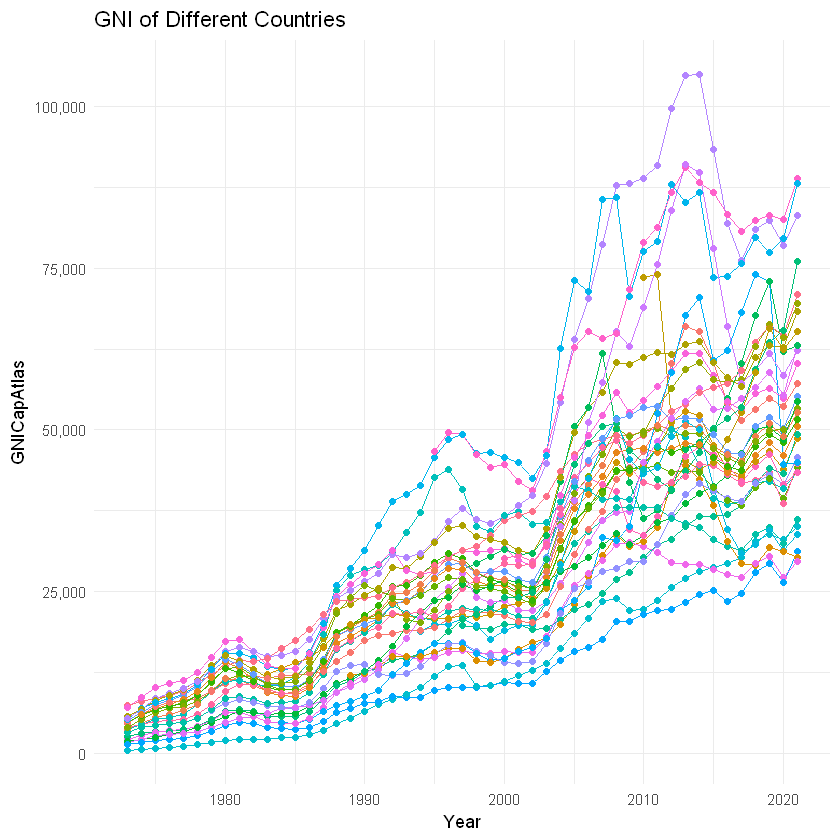

In [19]:
countries_GDP <- df[df$Country %in% c('switzerland', 'luxembourg', 'norway', 'ireland', 
                                                   'united states', 'faroe islands', 'denmark', 'cayman islands', 
                                                   'iceland', 'singapore', 'qatar', 'sweden', 'australia', 
                                                   'netherlands', 'hong kong sar, china', 'finland', 'austria', 
                                                   'germany', 'belgium', 'israel', 'canada', 'new zealand', 
                                                   'macao sar, china', 'united kingdom', 'france', 
                                                   'united arab emirates', 'japan', 'italy', 'korea, rep.', 
                                                   'kuwait', 'malta', 'brunei darussalam', 'spain'), ]

ggplot(data = countries_GDP, aes(x = Year, y = GNICapAtlas, color = Country)) +
  geom_line() + 
  geom_point() +  
  scale_y_continuous(labels = comma) +
  labs(x = 'Year', y = 'GNICapAtlas', title = 'GNI of Different Countries') +
  theme_minimal() + 
  theme(legend.position = "none")

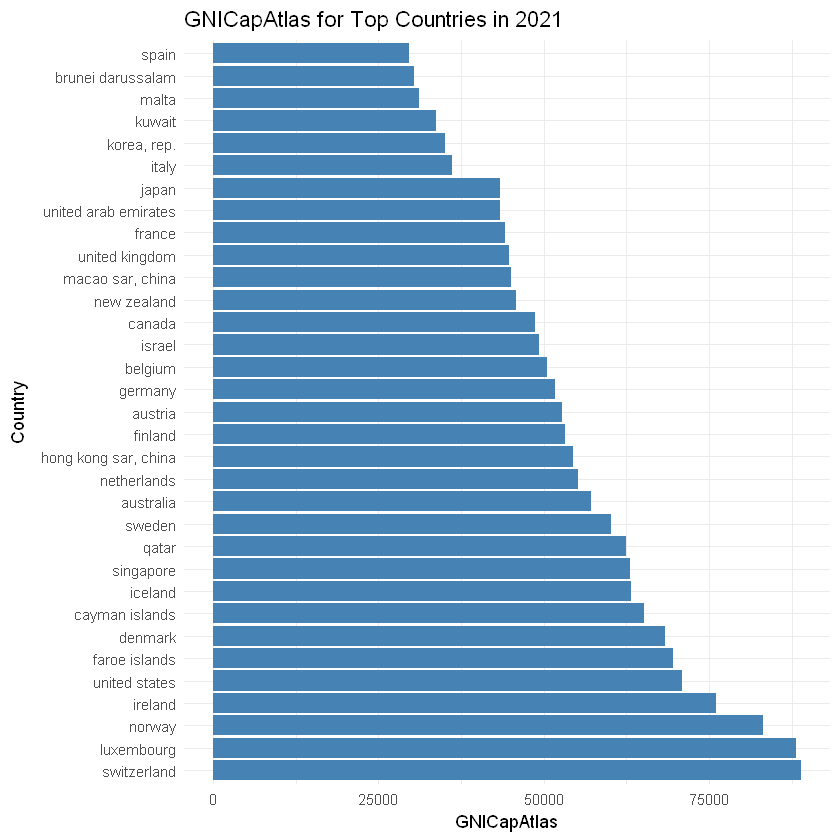

In [20]:
df$Country <- trimws(df$Country)  # Remove leading/trailing spaces
df$Country <- tolower(df$Country)  # Convert to lowercase
# df_2021$Country <- trimws(df_2021$Country)  # Remove leading/trailing spaces
# df_2021$Country <- tolower(df_2021$Country)  # Convert to lowercase for consistent matching

top_paises_GNICap = df_2021[df_2021$Country %in% c('switzerland', 'luxembourg', 'norway', 'ireland', 
                                                        'united states', 'faroe islands', 'denmark', 'cayman islands', 
                                                        'iceland', 'singapore', 'qatar', 'sweden', 'australia', 
                                                        'netherlands', 'hong kong sar, china', 'finland', 'austria', 
                                                        'germany', 'belgium', 'israel', 'canada', 'new zealand', 
                                                        'macao sar, china', 'united kingdom', 'france', 
                                                        'united arab emirates', 'japan', 'italy', 'korea, rep.', 
                                                        'kuwait', 'malta', 'brunei darussalam', 'spain'), ]

# Plotting the bar chart for GNICapAtlas
ggplot(top_paises_GNICap, aes(x = reorder(Country, -GNICapAtlas), y = GNICapAtlas)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Flips the chart for better readability
  labs(title = "GNICapAtlas for Top Countries in 2021", x = "Country", y = "GNICapAtlas") +
  theme_minimal()

In [21]:
# Replace specific country name discrepancies
df$Country <- gsub("korea, rep.", "korea, rep.", df$Country)
df$Country <- gsub("hong kong sar, china", "hong kong sar", df$Country)
df$Country <- gsub("macao sar, china", "macao sar", df$Country)
df$Country <- gsub("united states", "united states", df$Country)
df$Country <- gsub("united kingdom", "united kingdom", df$Country)

      SurfAreaSqKm            PopDens          PopGrowth                GDP 
        0.09774781         0.05277084         0.18094622         0.19584989 
         GDPGrowth       AdolFertRate      AgriValAddGDP         ExportsGDP 
       -0.23356281        -0.44687894        -0.56299684         0.31260594 
          FertRate          FDINetBoP           GNIAtlas    GrossCapFormGDP 
       -0.10915758         0.19746179         0.19550245        -0.20641929 
        ImportsGDP       IndValAddGDP       InflConsPric       LifeExpBirth 
        0.23870464        -0.34712777        -0.40860354         0.70635680 
     MerchTradeGDP          MilExpGDP      MobileSubs100         MortRateU5 
        0.13786013        -0.34191387         0.72786982        -0.59692185 
           NetMigr           PopTotal RevenueExGrantsGDP      SchEnrollPrim 
        0.17766053         0.04597344        -0.07584525        -0.04806532 
     TaxRevenueGDP     UrbanPopGrowth        GNICapAtlas 
       -0.11339087

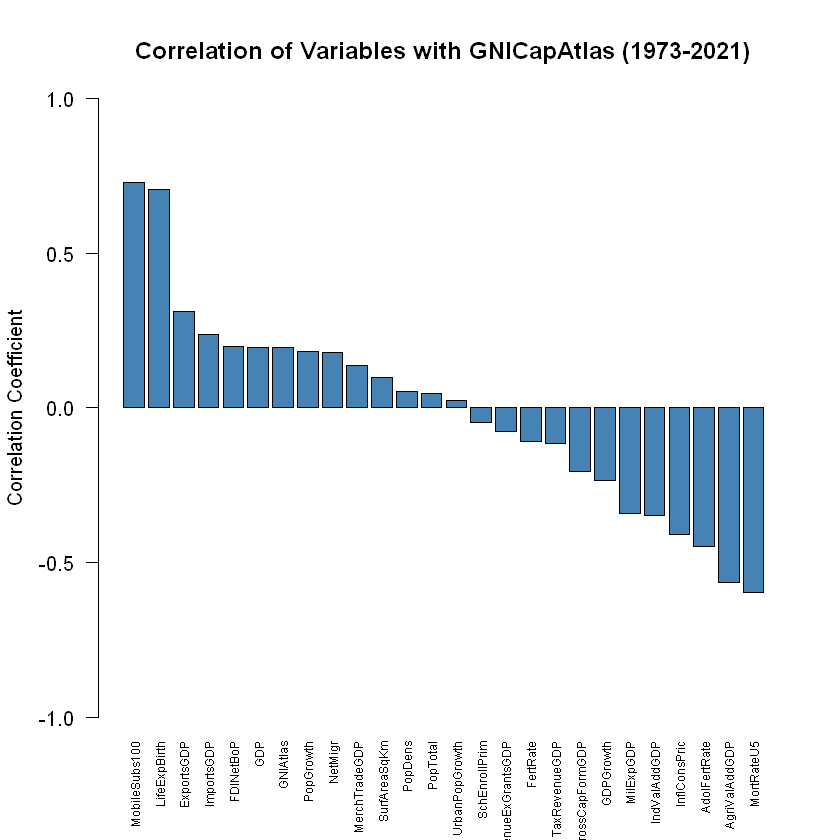

In [22]:
# Select relevant numeric columns for correlation analysis
numeric_columns <- c("SurfAreaSqKm", "PopDens", "PopGrowth", "GDP", "GDPGrowth", "AdolFertRate", 
                     "AgriValAddGDP", "ExportsGDP", "FertRate", "FDINetBoP", 
                     "GNIAtlas", "GrossCapFormGDP", "ImportsGDP", "IndValAddGDP", "InflConsPric", 
                     "LifeExpBirth", "MerchTradeGDP", "MilExpGDP", "MobileSubs100", "MortRateU5", 
                     "NetMigr", "PopTotal", "RevenueExGrantsGDP", "SchEnrollPrim", "TaxRevenueGDP", 
                     "UrbanPopGrowth", "GNICapAtlas")

# Filtering the dataframe for the top 30 countries across all years
# se ha excluido Bermuda porque era un valor muy extremo
top_30_countries_all_years <- df[df$Country %in% c('switzerland', 'luxembourg', 'norway', 'ireland', 
                                                   'united states', 'faroe islands', 'denmark', 'cayman islands', 
                                                   'iceland', 'singapore', 'qatar', 'sweden', 'australia', 
                                                   'netherlands', 'hong kong sar, china', 'finland', 'austria', 
                                                   'germany', 'belgium', 'israel', 'canada', 'new zealand', 
                                                   'macao sar, china', 'united kingdom', 'france', 
                                                   'united arab emirates', 'japan', 'italy', 'korea, rep.', 
                                                   'kuwait', 'malta', 'brunei darussalam', 'spain'), ]

# Select only the relevant numeric columns for analysis
top_30_numeric_data <- top_30_countries_all_years[, numeric_columns]

# Compute the correlation matrix
correlation_matrix <- cor(top_30_numeric_data, use = "complete.obs")

# Extract correlations of GNICapAtlas with the other variables
gni_correlations <- correlation_matrix["GNICapAtlas", ]

# Displaying the correlation numbers
print(gni_correlations)

# Visualizing the correlations with a bar plot (excluding GNICapAtlas itself)
gni_correlations <- gni_correlations[-which(names(gni_correlations) == "GNICapAtlas")]

# Plotting the correlations
barplot(sort(gni_correlations, decreasing = TRUE), 
        main = "Correlation of Variables with GNICapAtlas (1973-2021)", 
        col = "steelblue", 
        las = 2, 
        cex.names = 0.6,             # Adjust text size for better fit
        # xlab = "Variables", 
        ylab = "Correlation Coefficient", 
        ylim = c(-1, 1))

Ahora que tengo las variables que podrían predecir el crecimiento de un país, se va a hacer una regresión lineal, ya que parece que se puede adaptar bien a los datos.

In [23]:
# Create a named vector of correlations (as per your data)
correlation_values <- c(
  SurfAreaSqKm = 0.09774781, PopDens = 0.05277084, PopGrowth = 0.18094622, GDP = 0.19584989,
  GDPGrowth = -0.23356281, AdolFertRate = -0.44687894, AgriValAddGDP = -0.56299684, ExportsGDP = 0.31260594,
  FertRate = -0.10915758, FDINetBoP = 0.19746179, GNIAtlas = 0.19550245, GrossCapFormGDP = -0.20641929,
  ImportsGDP = 0.23870464, IndValAddGDP = -0.34712777, InflConsPric = -0.40860354, LifeExpBirth = 0.70635680,
  MerchTradeGDP = 0.13786013, MilExpGDP = -0.34191387, MobileSubs100 = 0.72786982, MortRateU5 = -0.59692185,
  NetMigr = 0.17766053, PopTotal = 0.04597344, RevenueExGrantsGDP = -0.07584525, SchEnrollPrim = -0.04806532,
  TaxRevenueGDP = -0.11339087, UrbanPopGrowth = 0.02376464
)

# Use the absolute value of correlations and normalize
weights <- abs(correlation_values) / sum(abs(correlation_values))

# Display the normalized weights
weights

SurfAreaSqKm            PopDens          PopGrowth                GDP 
       0.014412917        0.007781062        0.026680525        0.028878071 
         GDPGrowth       AdolFertRate      AgriValAddGDP         ExportsGDP 
       0.034438842        0.065892311        0.083013898        0.046093753 
          FertRate          FDINetBoP           GNIAtlas    GrossCapFormGDP 
       0.016095288        0.029115746        0.028826841        0.030436529 
        ImportsGDP       IndValAddGDP       InflConsPric       LifeExpBirth 
       0.035197005        0.051183998        0.060248602        0.104152327 
     MerchTradeGDP          MilExpGDP      MobileSubs100         MortRateU5 
       0.020327480        0.050415208        0.107324423        0.088016141 
           NetMigr           PopTotal RevenueExGrantsGDP      SchEnrollPrim 
       0.026196049        0.006778785        0.011183384        0.007087233 
     TaxRevenueGDP     UrbanPopGrowth 
       0.016719487        0.003504097

In [24]:
gni_filtered <- top_30_countries_all_years[, c("GNICapAtlas", numeric_columns)]

# Multiply each variable by its weight
gni_weighted_data <- gni_filtered %>%
  mutate(
    SurfAreaSqKm_weighted = SurfAreaSqKm * weights["SurfAreaSqKm"],
    PopDens_weighted = PopDens * weights["PopDens"],
    PopGrowth_weighted = PopGrowth * weights["PopGrowth"],
    GDP_weighted = GDP * weights["GDP"],
    GDPGrowth_weighted = GDPGrowth * weights["GDPGrowth"],
    AdolFertRate_weighted = AdolFertRate * weights["AdolFertRate"],
    AgriValAddGDP_weighted = AgriValAddGDP * weights["AgriValAddGDP"],
    ExportsGDP_weighted = ExportsGDP * weights["ExportsGDP"],
    FertRate_weighted = FertRate * weights["FertRate"],
    FDINetBoP_weighted = FDINetBoP * weights["FDINetBoP"],
    GNIAtlas_weighted = GNIAtlas * weights["GNIAtlas"],
    GrossCapFormGDP_weighted = GrossCapFormGDP * weights["GrossCapFormGDP"],
    ImportsGDP_weighted = ImportsGDP * weights["ImportsGDP"],
    IndValAddGDP_weighted = IndValAddGDP * weights["IndValAddGDP"],
    InflConsPric_weighted = InflConsPric * weights["InflConsPric"],
    LifeExpBirth_weighted = LifeExpBirth * weights["LifeExpBirth"],
    MerchTradeGDP_weighted = MerchTradeGDP * weights["MerchTradeGDP"],
    MilExpGDP_weighted = MilExpGDP * weights["MilExpGDP"],
    MobileSubs100_weighted = MobileSubs100 * weights["MobileSubs100"],
    MortRateU5_weighted = MortRateU5 * weights["MortRateU5"],
    NetMigr_weighted = NetMigr * weights["NetMigr"],
    PopTotal_weighted = PopTotal * weights["PopTotal"],
    RevenueExGrantsGDP_weighted = RevenueExGrantsGDP * weights["RevenueExGrantsGDP"],
    SchEnrollPrim_weighted = SchEnrollPrim * weights["SchEnrollPrim"],
    TaxRevenueGDP_weighted = TaxRevenueGDP * weights["TaxRevenueGDP"],
    UrbanPopGrowth_weighted = UrbanPopGrowth * weights["UrbanPopGrowth"]
  )

# Fit the weighted regression model
weighted_lm <- lm(
  GNICapAtlas ~ SurfAreaSqKm_weighted + PopDens_weighted + PopGrowth_weighted + GDP_weighted +
  GDPGrowth_weighted + AdolFertRate_weighted + AgriValAddGDP_weighted + ExportsGDP_weighted +
  FertRate_weighted + FDINetBoP_weighted + GNIAtlas_weighted + GrossCapFormGDP_weighted +
  ImportsGDP_weighted + IndValAddGDP_weighted + InflConsPric_weighted + LifeExpBirth_weighted +
  MerchTradeGDP_weighted + MilExpGDP_weighted + MobileSubs100_weighted + MortRateU5_weighted +
  NetMigr_weighted + PopTotal_weighted + RevenueExGrantsGDP_weighted + SchEnrollPrim_weighted +
  TaxRevenueGDP_weighted + UrbanPopGrowth_weighted,
  data = gni_weighted_data
)


Call:
lm(formula = GNICapAtlas ~ SurfAreaSqKm_weighted + PopDens_weighted + 
    PopGrowth_weighted + GDP_weighted + GDPGrowth_weighted + 
    AdolFertRate_weighted + AgriValAddGDP_weighted + ExportsGDP_weighted + 
    FertRate_weighted + FDINetBoP_weighted + GNIAtlas_weighted + 
    GrossCapFormGDP_weighted + ImportsGDP_weighted + IndValAddGDP_weighted + 
    InflConsPric_weighted + LifeExpBirth_weighted + MerchTradeGDP_weighted + 
    MilExpGDP_weighted + MobileSubs100_weighted + MortRateU5_weighted + 
    NetMigr_weighted + PopTotal_weighted + RevenueExGrantsGDP_weighted + 
    SchEnrollPrim_weighted + TaxRevenueGDP_weighted + UrbanPopGrowth_weighted, 
    data = gni_weighted_data)

Residuals:
   Min     1Q Median     3Q    Max 
-28005  -5360   -470   4308  39001 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.347e+05  2.847e+04  -4.730 2.72e-06 ***
SurfAreaSqKm_weighted        9.663e-03  1.407e-02   0.687 0.4923

`geom_smooth()` using formula = 'y ~ x'


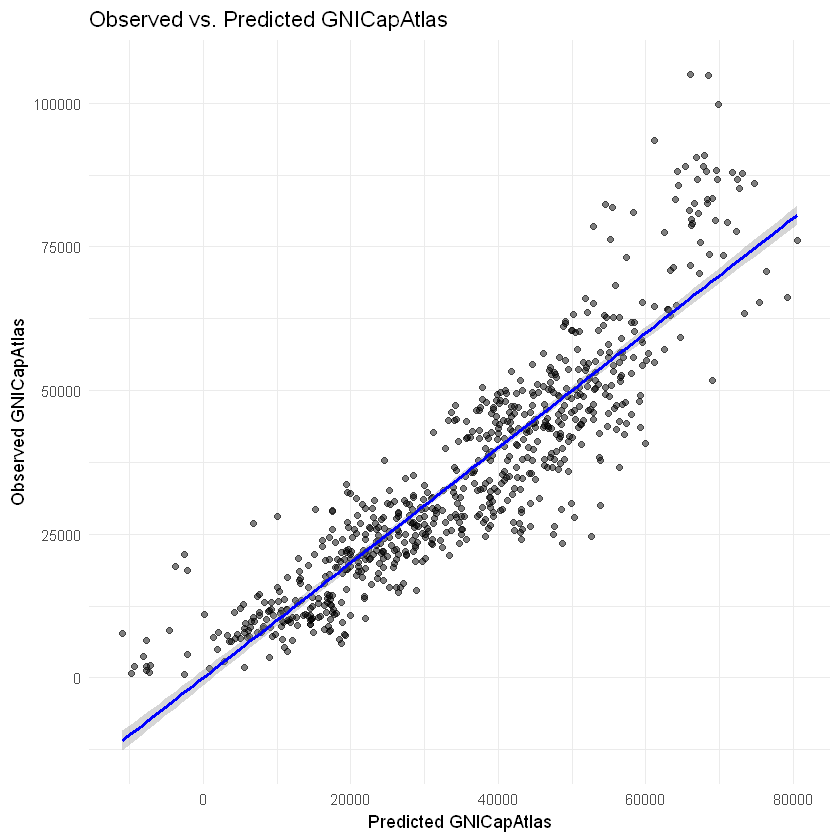

In [25]:
summary(weighted_lm)


library(ggplot2)
gni_weighted_data <- na.omit(gni_weighted_data)
gni_weighted_data$Predicted_GNICapAtlas <- predict(weighted_lm)


library(ggplot2)
ggplot(gni_weighted_data, aes(x = Predicted_GNICapAtlas, y = GNICapAtlas)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Observed vs. Predicted GNICapAtlas",
       x = "Predicted GNICapAtlas",
       y = "Observed GNICapAtlas") +
  theme_minimal()

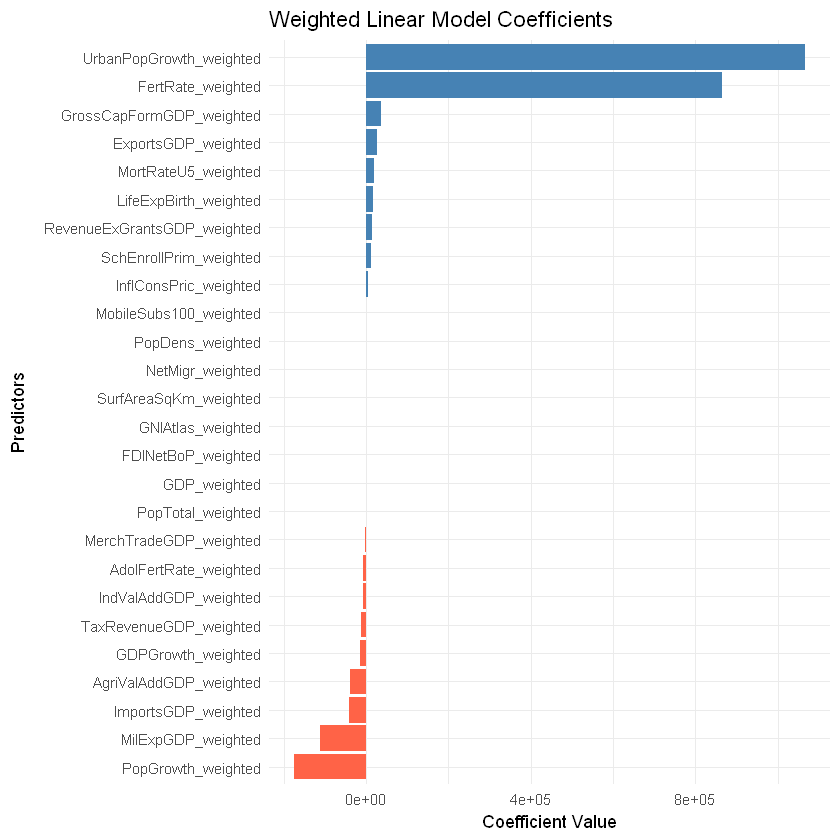

In [26]:
# Load necessary library
library(ggplot2)
library(dplyr)

# Extract coefficients from the model
coefficients <- summary(weighted_lm)$coefficients[, 1]  # Get only the estimates
coefficients <- coefficients[-1]  # Remove intercept

# Create a data frame for plotting
coef_data <- data.frame(
  Predictor = names(coefficients),
  Coefficient = coefficients
)

# Create the bar plot
ggplot(coef_data, aes(x = reorder(Predictor, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity", fill = ifelse(coef_data$Coefficient > 0, "steelblue", "tomato")) +
  coord_flip() +  # Flip coordinates for better visibility
  labs(title = "Weighted Linear Model Coefficients",
       x = "Predictors",
       y = "Coefficient Value") +
  theme_minimal()

### Exponencial


Call:
lm(formula = log(GNICapAtlas) ~ SurfAreaSqKm_weighted + PopDens_weighted + 
    PopGrowth_weighted + GDP_weighted + GDPGrowth_weighted + 
    AdolFertRate_weighted + AgriValAddGDP_weighted + ExportsGDP_weighted + 
    FertRate_weighted + FDINetBoP_weighted + GNIAtlas_weighted + 
    GrossCapFormGDP_weighted + ImportsGDP_weighted + IndValAddGDP_weighted + 
    InflConsPric_weighted + LifeExpBirth_weighted + MerchTradeGDP_weighted + 
    MilExpGDP_weighted + MobileSubs100_weighted + MortRateU5_weighted + 
    NetMigr_weighted + PopTotal_weighted + RevenueExGrantsGDP_weighted + 
    SchEnrollPrim_weighted + TaxRevenueGDP_weighted + UrbanPopGrowth_weighted, 
    data = gni_weighted_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54220 -0.14644  0.00395  0.14406  0.51963 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6.968e+00  6.535e-01  10.663  < 2e-16 ***
SurfAreaSqKm_weighted        2.543e-07 

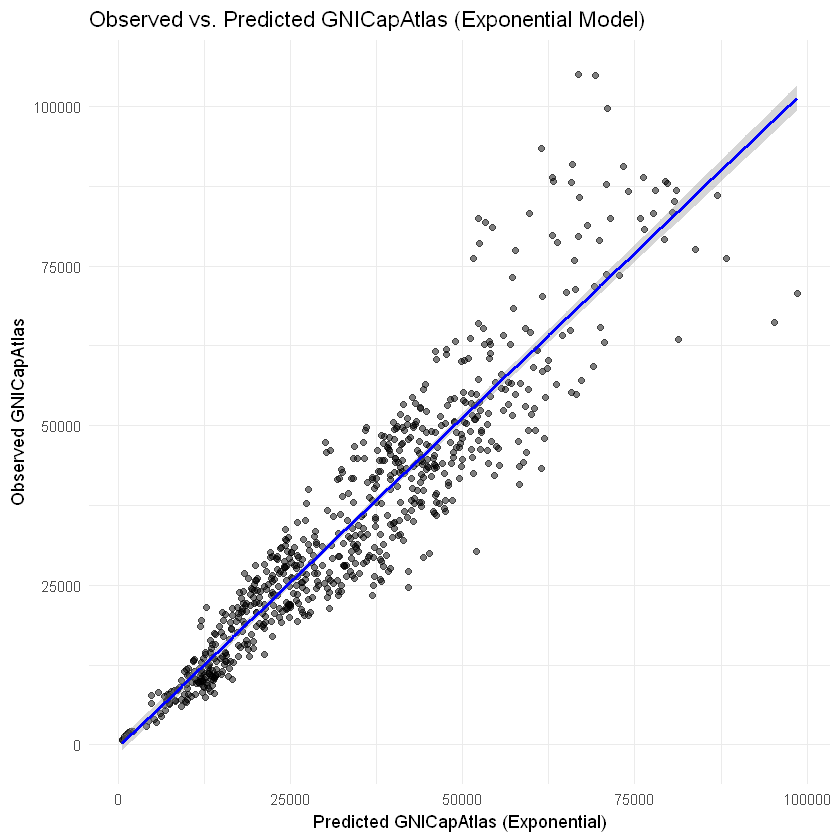

In [27]:
# Fit the exponential model
exp_lm <- lm(log(GNICapAtlas) ~ SurfAreaSqKm_weighted + PopDens_weighted + 
             PopGrowth_weighted + GDP_weighted + GDPGrowth_weighted + 
             AdolFertRate_weighted + AgriValAddGDP_weighted + ExportsGDP_weighted + 
             FertRate_weighted + FDINetBoP_weighted + GNIAtlas_weighted + 
             GrossCapFormGDP_weighted + ImportsGDP_weighted + IndValAddGDP_weighted + 
             InflConsPric_weighted + LifeExpBirth_weighted + MerchTradeGDP_weighted + 
             MilExpGDP_weighted + MobileSubs100_weighted + MortRateU5_weighted + 
             NetMigr_weighted + PopTotal_weighted + RevenueExGrantsGDP_weighted + 
             SchEnrollPrim_weighted + TaxRevenueGDP_weighted + UrbanPopGrowth_weighted,
             data = gni_weighted_data)

# View summary of the model
summary(exp_lm)

# Create predictions
gni_weighted_data$Predicted_GNICapAtlas_exp <- exp(predict(exp_lm))

# Plot observed vs. predicted values
library(ggplot2)

ggplot(gni_weighted_data, aes(x = Predicted_GNICapAtlas_exp, y = GNICapAtlas)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", formula = y ~ x, color = "blue") +
  labs(title = "Observed vs. Predicted GNICapAtlas (Exponential Model)",
       x = "Predicted GNICapAtlas (Exponential)",
       y = "Observed GNICapAtlas") +
  theme_minimal()

Se hace un modelo exponencial debido a la distribución y naturaleza de los datos, viendo en la regresión lineal que se podrían ajustar más los datos. Efectivamente, es mejor modelo, tiene mejor r-squared.

# Conclusiones

Los predictores que influyen más sobre el modelos son:
UrbanPopGrowth_weighted: Representa el crecimiento de la población urbana y destaca como el predictor más significativo con un coeficiente positivo sobresaliente.
FertRate_weighted: La tasa de fertilidad también tiene un impacto considerable en la predicción.
PopGrowth_weighted: El crecimiento total de la población tiene un efecto negativo importante.
MilExpGDP_weighted: El gasto militar relativo al PIB muestra una contribución negativa significativa.

Otros predictores, como GrossCapFormGDP_weighted y ExportsGDP_weighted, contribuyen de manera positiva, aunque con menor intensidad. Así como, ImportsGDP_weighted y AgriValAddGDP_weighted que tienen, en este caso, impactos negativos más moderados.


El crecimiento de la población urbana y una tasa de fertilidad adecuada son los factores más relevantes y positivos en la predicción de la calidad de vida. Esto sugiere que los países con crecimiento urbano controlado y niveles de natalidad equilibrados tienden a ofrecer mejores condiciones de vida.

Sin embargo, el gasto militar y el crecimiento de la población tienen impactos negativos, lo que podría reflejar una mala gestión de recursos o una mayor presión sobre los servicios básicos.